In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = pd.read_csv('train.csv')
other = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)
df = pd.concat([df1,other],axis=1)
X = df.drop('critical_temp',axis=1)
#X = scaler.fit_transform(X)
y = df['critical_temp']
corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna()
corr = corr.reset_index().rename(columns={'index':'feature'})
corr = corr.loc[1:]

In [30]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
X_pca = pd.DataFrame(PCA().fit_transform(X))
evr = pd.DataFrame(pca.explained_variance_ratio_)


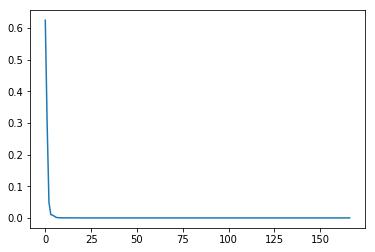

In [31]:
import matplotlib.pyplot as plt
plt.plot(evr.index,evr[0])
plt.show()

In [34]:
i = 0
while sum(evr[0].loc[:i])<0.99:
    j = i
    i=i+1
print(j)

3


In [36]:
PCA_analysis = pd.DataFrame(pca.components_,columns=X.columns)

In [40]:
PCA_analysis.loc[0:3].transpose()

,0,1,2,3
number_of_elements,-1.281054e-04,9.699701e-05,1.200671e-05,7.880001e-06
mean_atomic_mass,2.583997e-03,1.785986e-03,-3.667744e-03,5.150455e-03
wtd_mean_atomic_mass,3.847344e-03,8.064326e-04,1.115589e-03,-5.057827e-03
gmean_atomic_mass,3.218246e-03,4.719607e-04,-4.055346e-03,5.165359e-03
wtd_gmean_atomic_mass,4.506721e-03,-3.696023e-04,7.065761e-04,-4.933839e-03
entropy_atomic_mass,-2.866777e-05,1.958789e-05,9.932826e-07,2.718065e-05
wtd_entropy_atomic_mass,-3.627032e-05,2.551931e-05,-3.642286e-05,-9.932844e-06
range_atomic_mass,-3.508098e-03,7.351015e-03,2.007326e-04,-9.455079e-04
wtd_range_atomic_mass,2.417801e-03,6.457064e-04,7.004452e-03,5.785660e-03
std_atomic_mass,-9.320900e-04,2.832985e-03,2.122468e-04,-4.508002e-04


https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60